<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) 대회 참여(Join) 및 데이터셋 준비

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- **(Urclass Quiz) 훈련데이터셋을 사용해 H1N1 타겟으로 기준모델을 설정하세요. 기준모델의 정확도를 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files

file = files.upload()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Saving train_labels.csv to train_labels.csv


In [11]:
submission = pd.read_csv('submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_labels = pd.read_csv('train_labels.csv')

In [12]:
target = 'vacc_h1n1_f'
train = pd.merge(train, train_labels[target], left_index=True, right_index=True)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2)

In [13]:
train[target].value_counts()

0    25661
1     8062
Name: vacc_h1n1_f, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score

pred = [0] * len(train)
baseline = accuracy_score(train[target], pred)
baseline

0.7609346736648578

### 2) 데이터 EDA 및 특성공학 수행
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [15]:
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


In [17]:
def feature_engineering(df):
  selected_cols = df.select_dtypes(include = ['number','object'])
  labels = selected_cols.nunique()
  selected_features = labels[labels <= 30].index.tolist()
  df = df[selected_features]

  behaviorals = [col for col in df.columns if 'behavior' in col]
  df['behavior'] = df[behaviorals].sum(axis = 1)
  df.drop(columns = behaviorals, inplace = True)

  dels = [col for col in df.columns if 'seas' in col or 'employment' in col]
  df.drop(columns = dels, inplace = True)

  return df

train = feature_engineering(train)
val = feature_engineering(val)
test = feature_engineering(test)

In [18]:
X_train = train.drop(target, axis = 1)
y_train = train[target]
X_val = val.drop(target, axis = 1)
y_val = val[target]


### 3) 모델링 수행
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **(Urclass Quiz) 검증세트의 F1-score를 제출하세요. (0.5 이상 통과)**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, max_depth=6, criterion='entropy')
)

In [22]:
pipe.fit(X_train, y_train)

print('훈련 정확도', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도 0.8265278889778489
검증 정확도 0.8264737279089076


In [23]:
model_dt = pipe.named_steps['decisiontreeclassifier']

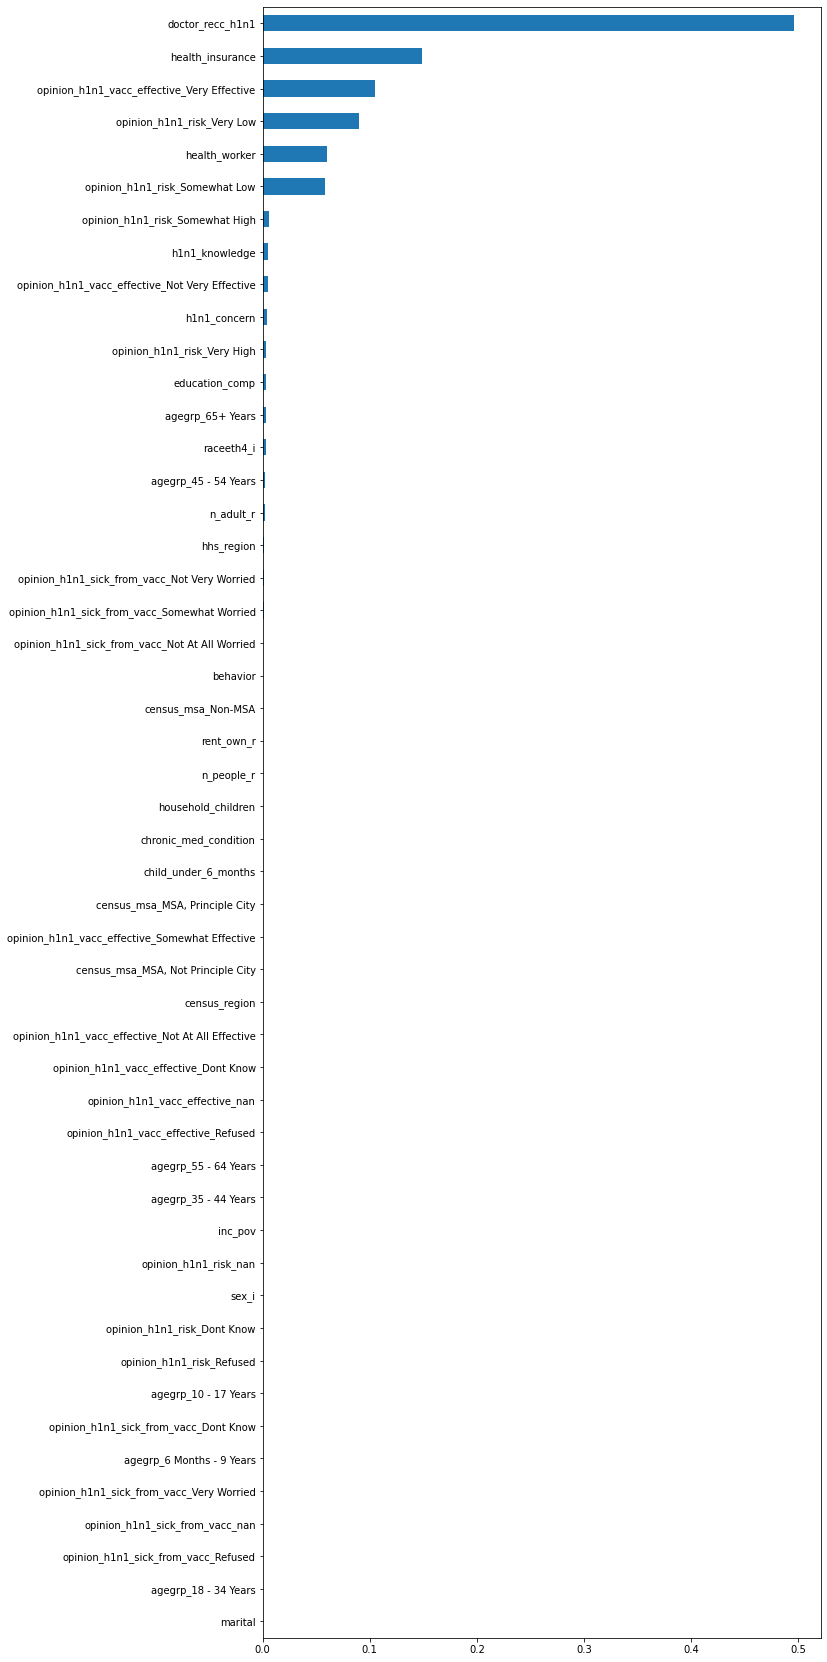

In [29]:
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [39]:
res = pipe.predict(test)

submission['vacc_h1n1_f'] = res
submission.to_csv('submission_H1N1.csv', index=False)

### 4) 테스트셋 예측 결과 제출(Submission)

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**
 

## 🔥 도전과제(Github - Discussion)

### 4) 2개 이상의 imputer를 사용해 각각 특성-타겟 관계 그래프를 그려 공유하고 다음 질문에 대해 서로 논의해 보세요. 
- scikit-learn imputer([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- 사용하신 imputer는 각각 어떤 장단점을 갖고 있으며 어떤 상황에서 사용하면 좋을까요? 
- 만드신 특성-타겟 관계 그래프에서 차이점이 있다면 무엇이고, 왜 그런 차이가 발생했다고 생각하시나요? 
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###